# Zadanie 3 (7 punktów)

Celem ćwiczenia jest imlementacja metody [Minimax z obcinaniem alpha-beta](https://en.wikipedia.org/wiki/Alpha%E2%80%93beta_pruning) do gry  Czwórki (ang. Connect Four).

W trakcie ćwiczenia można skorzystać z reposytorium z implementacją gry [Connect Four udostępnionym przez Jakuba Łyskawę](https://github.com/lychanl/two-player-games). Ewentualnie, można zaimplementować samemu grę Connect Four.

Należy zaimplementować co najmniej dwie heurystyki do ewaluacji planszy.  

Implementację algorytmu Minimax (klasa `MiniMaxSolver`) należy przetestować używając różną głębokość przeszukiwania symulując grę "komputer vs komputer". W eksperymentach należy również zademonstrować różnice pomiędzy heurystykami.  

W ramach zadania można zaimplementować dowolną liczbę dodatkowych metod w klasie `MiniMaxSolver`.

Punktacja:

- Działająca metoda Minimax oraz heurystyki do ewaluacji planszy. - **2 pkt**
- Działająca metoda Minimax z obcinaniem alpha-beta. - **1.5 pkt**
- Analiza jakości solvera w zależności od głębokości przeszukiwania - wykresy. - **2pkt**
    - należy zaimplementować w tym celu prostą wizualizację rozgrywki dwóch agentów
- Jakość kodu. - **1.5pkt**

Aby importowanie elementów z poniższej komórki działało należy umieścić tego notebooka w tym samym folderze co paczkę `two_player_games`:
```
├── LICENSE
├── README.md
├── minimax.ipynb # <<< HERE
├── test
│   ├── __init__.py
│   ├── test_connect_four.py
│   ├── test_dots_and_boxes.py
│   └── test_pick.py
└── two_player_games
    ├── __init__.py
    ├── games
    │   ├── connect_four.py
    │   └── dots_and_boxes.py
    ├── move.py
    ├── player.py
    └── state.py
```

In [439]:
from typing import Tuple, List, Iterable, Optional
from numpy import random
import matplotlib.pyplot as plt

from two_player_games.player import Player
from two_player_games.games.connect_four import ConnectFour, ConnectFourMove

Wielkość planszy

In [440]:
ROW_COUNT = 6
COLUMN_COUNT = 7
MAX_DEPTH = 9
GAME_NUMBER = 50

In [ ]:
class MinMaxSolver:

    def __init__(self, game: ConnectFour):
        self.game = game
        self.state = game.state
        
    def get_best_move(self, depth)->int:
        self.state = self.game.state
        move = self.minimax(depth, -10000, 10000, True)[0]
        return move

    def is_valid_move(self, col_index:int)->bool:
        if(self.state.fields[col_index][ROW_COUNT-1]):
            return False
        else:
            return True

    def heuristic1(self)->float:
        score = 0
        curr = self.game.state.get_current_player().char  
        col_score = []
        points = 0
        center = int(COLUMN_COUNT/2)

        if(COLUMN_COUNT%2):
            for i in range(COLUMN_COUNT):
                col_score.append(points)
                if(i < center):
                    points += 1
                elif(i == center):
                    col_score[i] += 5
                else:
                    points -= 1
        else:
            for i in range(COLUMN_COUNT):
                col_score.append(points)
                if(i < center):
                    points += 1
                elif(i == center or i == center + 1):
                    col_score[i] += 5
                else:
                    points -= 1

        for col_id in range(COLUMN_COUNT):
            for row_id in range(ROW_COUNT):
                if(self.state.fields[col_id][row_id] is None):
                    continue
                if(self.state.fields[col_id][row_id].char == curr):
                    score += col_score[col_id]
                else:
                    score -= col_score[col_id]
        return score

    def heuristic2(self)->float:
        score = 0
        curr = self.game.state.get_current_player().char  

        for col_id in range(COLUMN_COUNT):
            for row_id in range(ROW_COUNT):
                if(self.state.fields[col_id][row_id] is None):
                    continue
                if(self.state.fields[col_id][row_id].char == curr):
                    score += row_id
                else:
                    score -= row_id

        return score
    
    def evaluate(self)->float:
        score = float
        if(self.game.state.get_current_player().char == "a"):
            score = self.heuristic1()
        elif(self.game.state.get_current_player().char == "b"):
            score = self.heuristic2()
        return score

    def minimax(self, depth: int, alpha:float, beta:float, is_maximizing_player:bool)-> Tuple[int, float]:
        if(depth == 0 or self.state.is_finished()):
            return -1, self.evaluate()

        best_move = -1
        if(is_maximizing_player):
            max_score = -10000
            for i in range(COLUMN_COUNT):
                if(self.is_valid_move(i)):
                    self.state = self.state.make_move(ConnectFourMove(i))
                    score = self.minimax(depth - 1, alpha, beta, False)[1]
                    if(score > max_score):
                        max_score = score
                        best_move = i
                    if(alpha > score):
                        alpha = score
                    if(alpha >= beta):
                        break

            return best_move, max_score 
        else:
            min_score = 10000
            for i in range(COLUMN_COUNT):
                if(self.is_valid_move(i)):
                    self.state = self.state.make_move(ConnectFourMove(i))
                    score = self.minimax(depth - 1, alpha, beta, True)[1]
                    if(score < min_score):
                        min_score = score
                        best_move = i
                    if(beta < score):
                        beta = score
                    if(alpha >= beta):
                        break

            return best_move, min_score

Rozgrywka

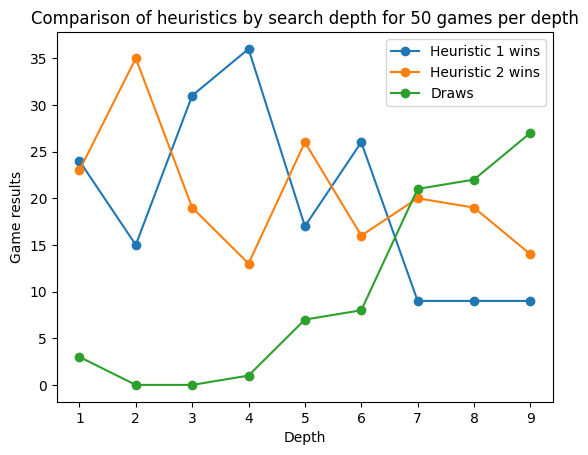

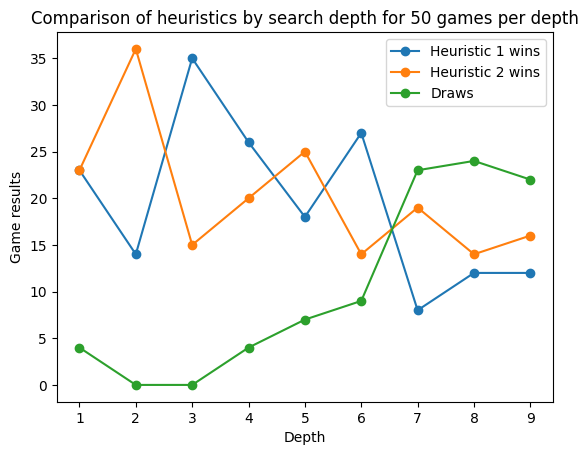

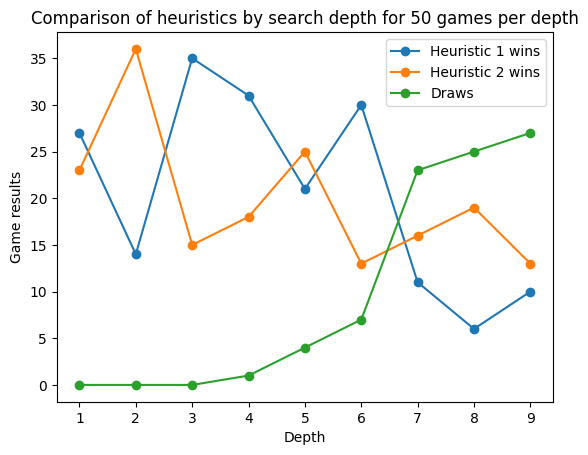

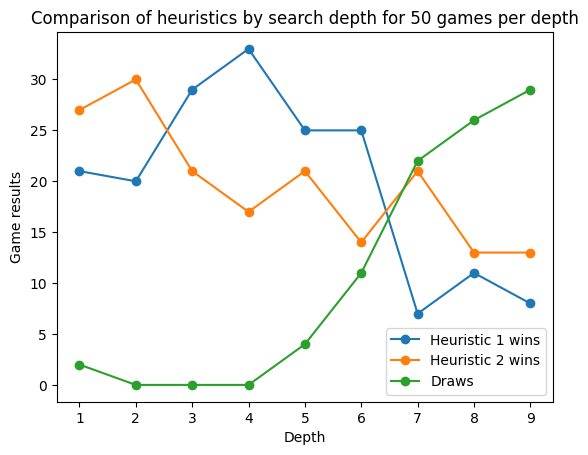

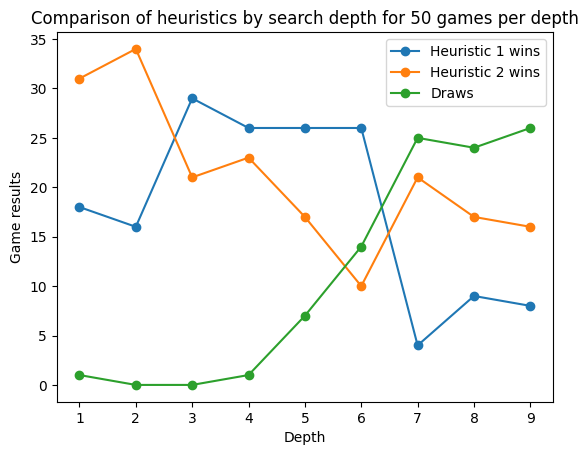

In [442]:
p1 = Player("a")
p2 = Player("b")

for j in range(5):
    depth_list = [0] * MAX_DEPTH
    h1_wins = [0] * MAX_DEPTH
    h2_wins = [0] * MAX_DEPTH
    draws = [0] * MAX_DEPTH

    for depth in range(MAX_DEPTH):
        depth_list[depth] = depth+1
        for i in range(GAME_NUMBER):
            game = ConnectFour(size=(COLUMN_COUNT, ROW_COUNT), first_player=p1, second_player=p2)
            game.make_move(ConnectFourMove(random.randint(COLUMN_COUNT)))
            game.make_move(ConnectFourMove(random.randint(COLUMN_COUNT)))
            while(game.state.is_finished() == False):
                minmax = MinMaxSolver(game)
                game.make_move(ConnectFourMove(minmax.get_best_move(depth+1)))

            if(game.state.get_winner()):
                if(game.state.get_winner().char == p1.char):
                    h1_wins[depth] += 1
                elif(game.state.get_winner().char == p2.char):
                    h2_wins[depth] += 1
            else:
                draws[depth] += 1

    plt.plot(depth_list, h1_wins, label="Heuristic 1 wins", marker='o')
    plt.plot(depth_list, h2_wins, label="Heuristic 2 wins", marker='o')
    plt.plot(depth_list, draws, label="Draws", marker='o')
    plt.xlabel("Depth")
    plt.ylabel("Game results")
    plt.title(f"Comparison of heuristics by search depth for {GAME_NUMBER} games per depth")
    plt.legend()
    plt.show()

- Głębokość 1 - względnie wyrównane, więcej zwycięstw jednak u heurystyki 2
- Głębokość 2 - zdecydowana przewaga heurystyki 2
- Głębokość 3-6 - o wiele lepsze wyniki heurystyki 1, z wyjątkiem na głębokości 5 gdzie czasami heurystyka 2 daje radę osiągnąć więcej zwycięstw
- Głębokość 6+ - heurystyka 2 ponownie jest bardziej efektywna niż pierwsza, chociaż liczba remisów też wskazuje że są one bardziej wyrównane niż na niższych głebokościach